### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1184]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1187]:
data = pd.read_csv('data/coupons.csv')

In [1189]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [1194]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [1196]:
columnswithnan = []
for col in data.columns:
    if(data[col].isna().any() == True):
        columnswithnan.append(col)
print(columnswithnan)

['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


There are 6 columns with missing data. Let's investigate them one by one to decide how to fix them

In [1199]:
data['car'].value_counts(dropna=False)
data[(data['car'].isna())].shape[0]/data.shape[0]

0.9914853358561968

In [1201]:
data['Bar'].value_counts(dropna=False)
data[data['Bar'].isna()].shape[0]/data.shape[0]

0.008435824660990224

In [1203]:
data['CoffeeHouse'].value_counts(dropna=False)
data[data['CoffeeHouse'].isna()].shape[0]/data.shape[0]

0.017108167770419427

In [1205]:
data['CarryAway'].value_counts(dropna=False)
data[data['CarryAway'].isna()].shape[0]/data.shape[0]

0.011904761904761904

In [1207]:
data['RestaurantLessThan20'].value_counts(dropna=False)
data[data['RestaurantLessThan20'].isna()].shape[0]/data.shape[0]

0.010249132765689057

In [1209]:
data['Restaurant20To50'].value_counts(dropna=False)
data[data['Restaurant20To50'].isna()].shape[0]/data.shape[0]

0.014900662251655629

In [1211]:
nonCarNanCount = data[data['Bar'].isna()].shape[0] + data[data['CoffeeHouse'].isna()].shape[0] + data[data['CarryAway'].isna()].shape[0] + data[data['RestaurantLessThan20'].isna()].shape[0] + + data[data['Restaurant20To50'].isna()].shape[0] 
ratio = nonCarNanCount / data.shape[0]
ratio

0.06259854935351625

In [1213]:
data['age'].value_counts(dropna=False)

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [1216]:
# Since 99% of the car column has missing data, we can't simply drop those rows. Assuming that each of the row is associated with some driving event, we will replace the values with 'unknown vehicle'
data.loc[(data['car'].isna()),'car'] = 'unknown vehicle'

# Since 6% of the rows have empty values for 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', its ok to drop them
data = data[data['Bar'].notna()]
data = data[data['CoffeeHouse'].notna()]
data = data[data['CarryAway'].notna()]
data = data[data['RestaurantLessThan20'].notna()]
data = data[data['Restaurant20To50'].notna()]

# Also all these columns contains values like 'less1' and 'never'. Since both mean the same, we will combine them into one value 'never'
data = data.replace(to_replace={'Bar':'less1'}, value='never')
data = data.replace(to_replace={'CoffeeHouse':'less1'}, value='never')
data = data.replace(to_replace={'CarryAway':'less1'}, value='never')
data = data.replace(to_replace={'RestaurantLessThan20':'less1'}, value='never')
data = data.replace(to_replace={'Restaurant20To50':'less1'}, value='never')

# Age column is string. We should convert it to numeric. But it contains some string value like 50plus, below21. For simplicity, we will set 51 for 50plus and 20 for below21
data = data.replace(to_replace={'age':'50plus'}, value='51')
data = data.replace(to_replace={'age':'below21'}, value='20')
data['age'] = pd.to_numeric(data['age'])

In [1218]:
data.isna().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                     False
Bar                     False
CoffeeHouse             False
CarryAway               False
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

4. What proportion of the total observations chose to accept the coupon? 



In [1235]:
ratio = data.query('Y == 1').shape[0] / data.shape[0]
ratio

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

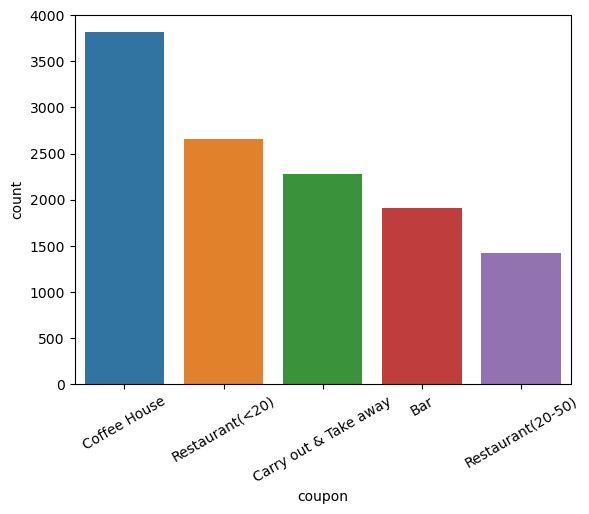

In [1223]:
counts = data['coupon'].value_counts().reset_index()
sns.barplot(counts, x='coupon', y='count')
plt.xticks(rotation=30)

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

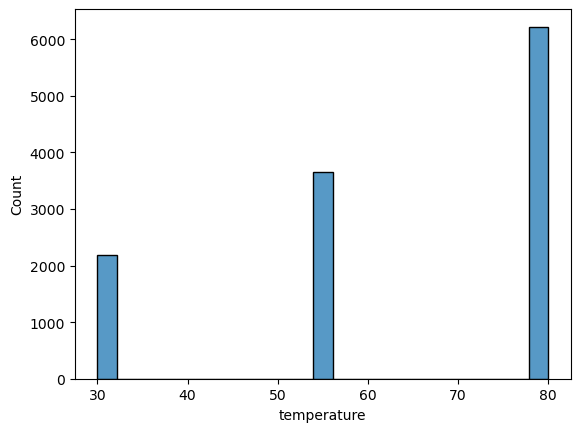

In [1226]:
sns.histplot(data, x='temperature')

In [1228]:
def generateDataForAcceptanceRate(sub_data, conditions, groups):
    acceptance_rates = []
    for condition in conditions:
        temp = sub_data.query(condition)
        acceptance_rates.append(temp[temp['Y'] == 1].shape[0] / temp.shape[0])
    
    data_acceptance_rate = {'group':groups, 'acceptance rate':acceptance_rates}
    df = pd.DataFrame(data_acceptance_rate)
    sns.barplot(df, x='group', y='acceptance rate')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1231]:
data_bar = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [1237]:
ratio_bar = data_bar.query('Y == 1').shape[0]/data_bar.shape[0]
ratio_bar

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


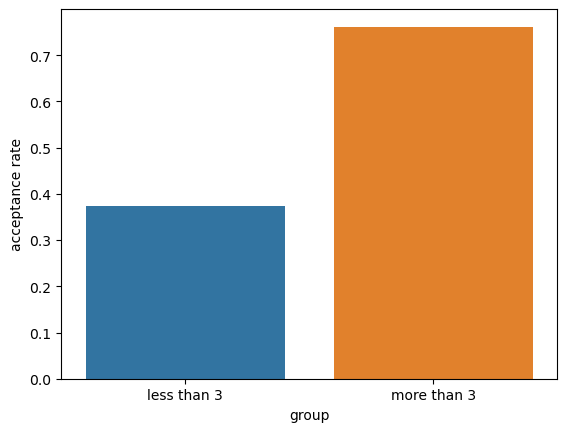

In [1242]:
generateDataForAcceptanceRate(data_bar, ['Bar == "1~3" or Bar == "never"', 'Bar == "4~8" or Bar == "gt8"'], ['less than 3', 'more than 3'])

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


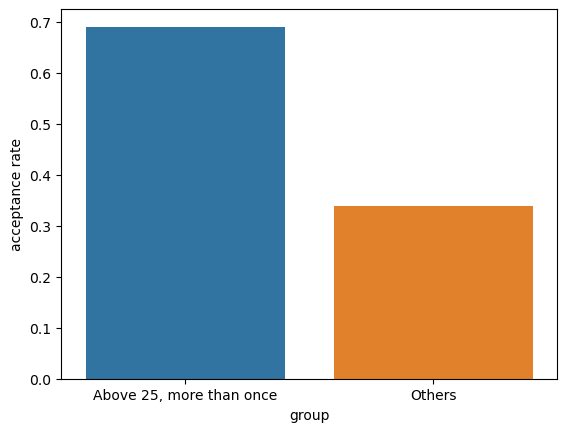

In [1245]:
generateDataForAcceptanceRate(data_bar, ['age > 25 and Bar != "never"', 'age <= 25 or Bar == "never"'], ['Above 25, more than once', 'Others'])

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


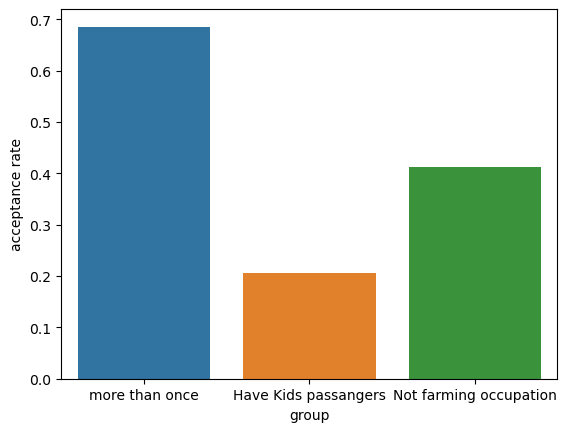

In [1248]:
generateDataForAcceptanceRate(data_bar, ['Bar != "never"', 'passanger == "Kid(s)"', 'occupation != "Farming Fishing & Forestry"'], ['more than once', 'Have Kids passangers', 'Not farming occupation'])

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [1251]:
data_bar['passanger'].value_counts()

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'more than once, Kids passangers, not widowed'),
  Text(1, 0, 'more than once, below 30 years'),
  Text(2, 0, 'more than 4 times to cheap restaurants')])

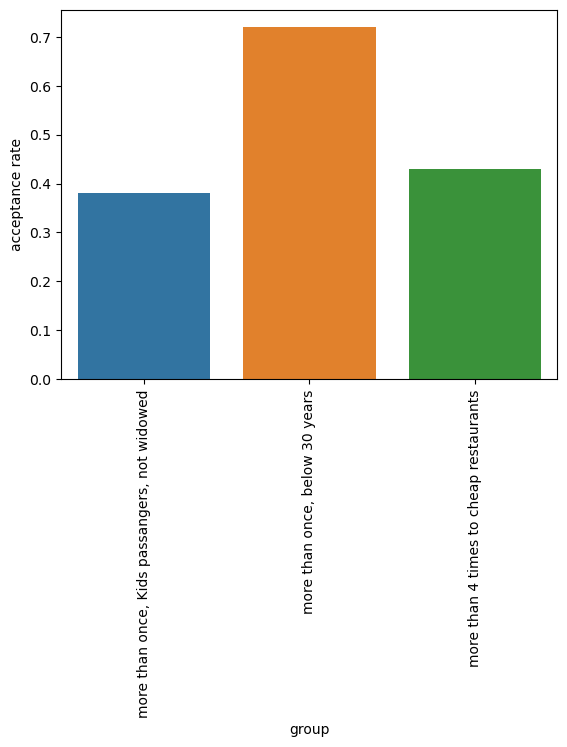

In [1253]:
condition1 = 'Bar != "never" and passanger == "Kid(s)" and maritalStatus != "Widowed"'
condition2 = 'Bar != "never" and age < 30'
condition3 = 'RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8"'
generateDataForAcceptanceRate(data_bar, [condition1, condition2, condition3], ['more than once, Kids passangers, not widowed', 'more than once, below 30 years', 'more than 4 times to cheap restaurants'])
plt.xticks(rotation=90)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Drives who goes to bars more than once are likely to accept bar coupons
- Drives with kids passangers are less likely to accept bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the CoffeeHouse Coupons**

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [1259]:
data_coffee = data.query('coupon == "Coffee House"')

2. What proportion of coffee house coupons were accepted?

In [1264]:
ratio_bar = data_coffee.query('Y == 1').shape[0]/data_coffee.shape[0]
ratio_bar

0.49633123689727465

3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

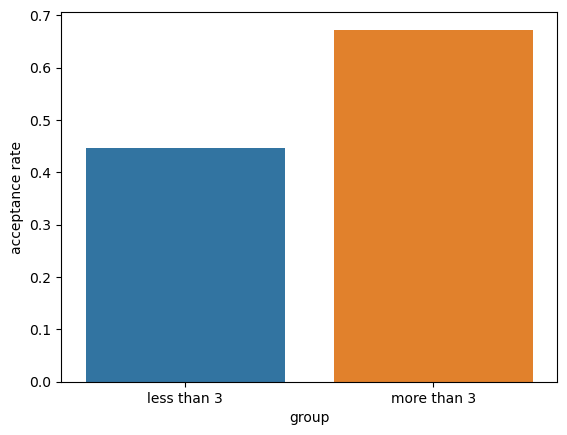

In [1267]:
generateDataForAcceptanceRate(data_coffee, ['CoffeeHouse == "1~3" or CoffeeHouse == "never"', 'CoffeeHouse == "4~8" or CoffeeHouse == "gt8"'], ['less than 3', 'more than 3'])

4. Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others.

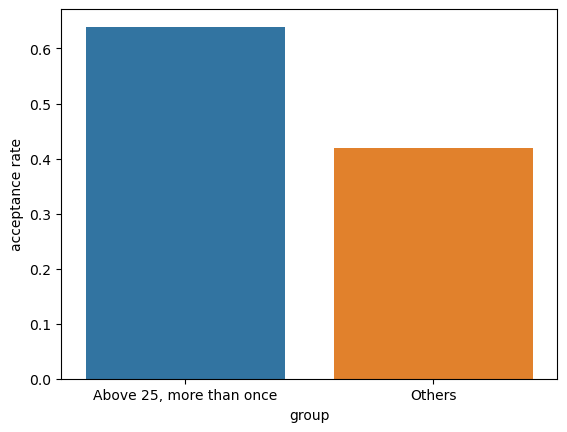

In [1270]:
generateDataForAcceptanceRate(data_coffee, ['age > 25 and CoffeeHouse != "never"', 'age <= 25 or CoffeeHouse == "never"'], ['Above 25, more than once', 'Others'])

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

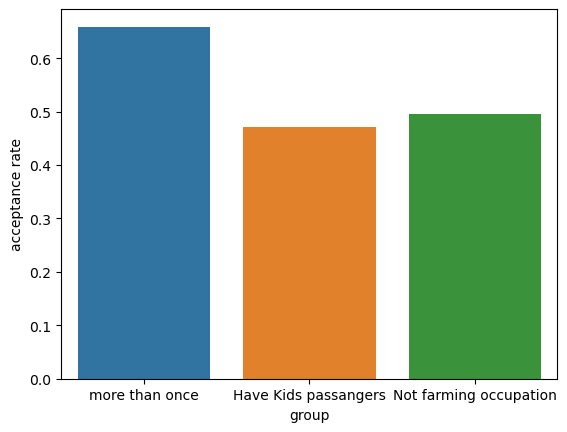

In [1273]:
generateDataForAcceptanceRate(data_coffee, ['CoffeeHouse != "never"', 'passanger == "Kid(s)"', 'occupation != "Farming Fishing & Forestry"'], ['more than once', 'Have Kids passangers', 'Not farming occupation'])


6. Compare the acceptance rates between those drivers who:

- go to coffee house more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to coffee house more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

(array([0, 1, 2]),
 [Text(0, 0, 'more than once, Kids passangers, not widowed'),
  Text(1, 0, 'more than once, below 30 years'),
  Text(2, 0, 'more than 4 times to cheap restaurants')])

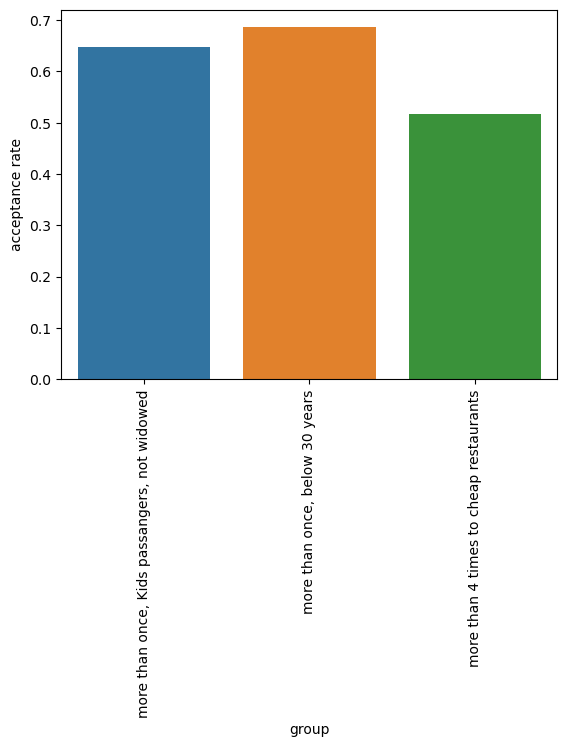

In [1276]:
condition1 = 'CoffeeHouse != "never" and passanger == "Kid(s)" and maritalStatus != "Widowed"'
condition2 = 'CoffeeHouse != "never" and age < 30'
condition3 = 'RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8"'
generateDataForAcceptanceRate(data_coffee, [condition1, condition2, condition3], ['more than once, Kids passangers, not widowed', 'more than once, below 30 years', 'more than 4 times to cheap restaurants'])
plt.xticks(rotation=90)


7.  Compare the acceptance rate between drives who are above 20 years with drivers who are below 20 years of age

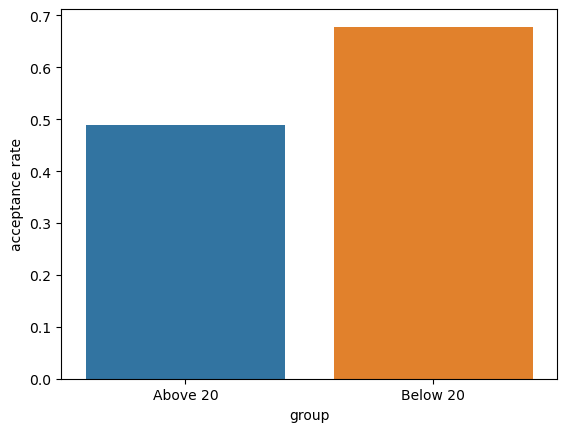

In [1279]:
generateDataForAcceptanceRate(data_coffee, ['age > 20', 'age <= 20'], ['Above 20', 'Below 20'])

8.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Drivers who has visited coffee house more than once are more likely to accept the coupons
- Acceptance rate is higher in drivers below 20 years of age